In [284]:
import pandas as pd

# Define the path to the dataset
dataset_path = r"C:\Users\Lenovo\Downloads\Customer-Churn-Records (1).csv"

# Load the dataset into a pandas DataFrame
customer_churn_df = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame
customer_churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [285]:
df=customer_churn_df

EDA

In [287]:
print(df['Geography'].value_counts())

Geography
France     179
Germany    114
Spain      107
Name: count, dtype: int64


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           400 non-null    int64  
 1   CustomerId          400 non-null    int64  
 2   Surname             400 non-null    object 
 3   CreditScore         400 non-null    int64  
 4   Geography           400 non-null    object 
 5   Gender              400 non-null    object 
 6   Age                 400 non-null    int64  
 7   Tenure              400 non-null    int64  
 8   Balance             400 non-null    float64
 9   NumOfProducts       400 non-null    int64  
 10  HasCrCard           400 non-null    int64  
 11  IsActiveMember      400 non-null    int64  
 12  EstimatedSalary     400 non-null    float64
 13  Exited              400 non-null    int64  
 14  Complain            400 non-null    int64  
 15  Satisfaction Score  400 non-null    int64  
 16  Card Typ

In [289]:
import pandas as pd
 
# Assuming df is your DataFrame
 
# Convert specified columns to categorical data type
categorical_columns = ['HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score']
 
# Convert to categorical type
df[categorical_columns] = df[categorical_columns].astype('object')
 
# If needed, print the data types of the DataFrame to confirm changes
print(df.dtypes)

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard              object
IsActiveMember         object
EstimatedSalary       float64
Exited                 object
Complain               object
Satisfaction Score     object
Card Type              object
Point Earned            int64
dtype: object


In [290]:
df.describe().round(3)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Point Earned
count,400.000,4.000000e+02,400.000,400.000,400.000,400.000,400.000,400.000,400.000
mean,200.500,1.569202e+07,647.922,38.232,5.108,74208.806,1.545,101889.527,585.848
std,115.614,7.087833e+04,100.430,10.331,2.993,62644.649,0.578,58549.385,227.180
min,1.000,1.556824e+07,376.000,19.000,0.000,0.000,1.000,371.050,119.000
25%,100.750,1.562814e+07,577.750,31.000,2.000,0.000,1.000,48437.295,388.000
50%,200.500,1.569181e+07,655.500,36.000,5.000,96766.965,2.000,101882.860,582.500
75%,300.250,1.575494e+07,721.250,43.000,8.000,125634.460,2.000,152475.902,775.500
max,400.000,1.581384e+07,850.000,80.000,10.000,213146.200,4.000,199725.390,994.000


In [291]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

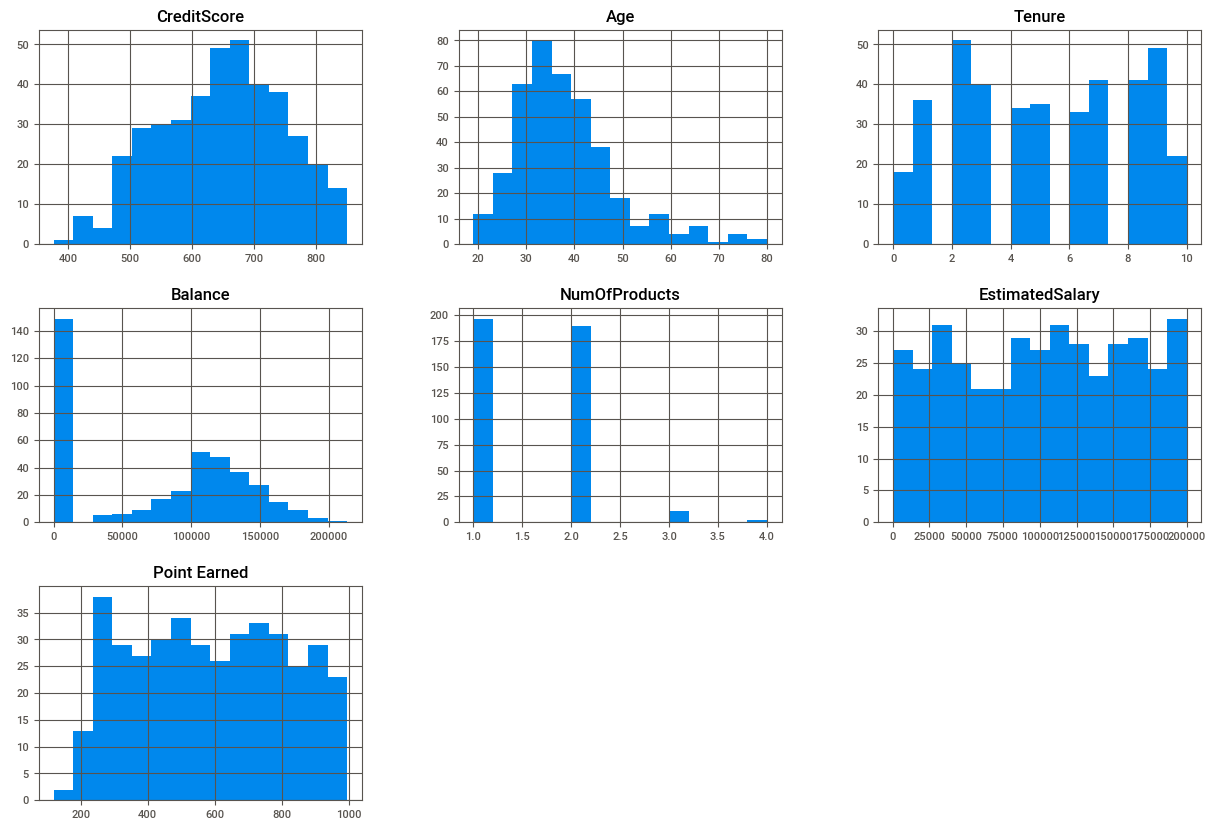

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical variables
numerical_cols = ['CreditScore',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard'
       , 'EstimatedSalary', 'Exited',
       'Satisfaction Score', 'Card Type', 'Point Earned']
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.show()

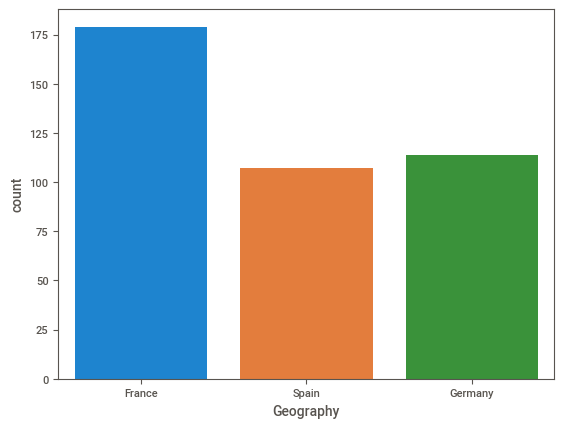

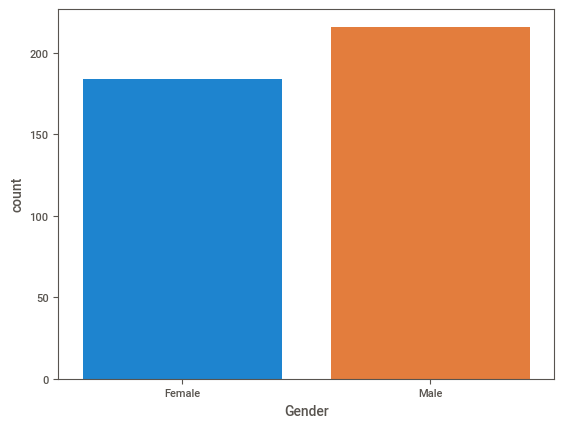

In [293]:
# Bar plot for categorical variables
categorical_cols = ['Geography', 'Gender']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.show()

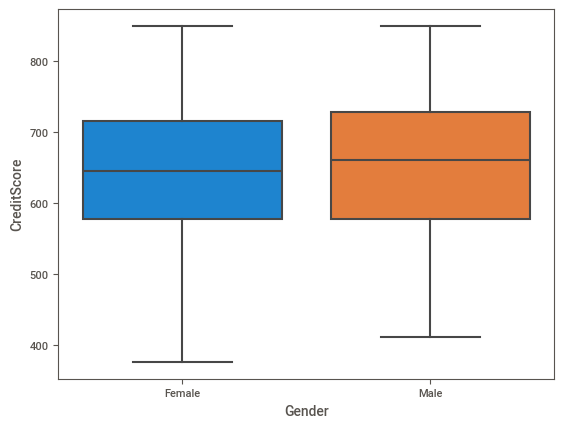

In [294]:
# Scatter plot for numerical variables


# Box plot for loan amount by loan grade
sns.boxplot(x='Gender', y='CreditScore', data=df)
plt.show()

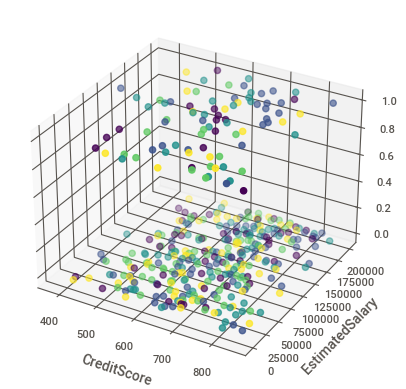

In [295]:
# 3D Scatter plot for three numerical variables
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['CreditScore'], df['EstimatedSalary'], df['Complain'], c=df['Satisfaction Score'])
ax.set_xlabel('CreditScore')
ax.set_ylabel('EstimatedSalary')
ax.set_zlabel('Complain')
plt.show()

In [296]:
import sweetviz as sv

# Generate the report
report = sv.analyze(df)
report.show_html('customer_churn_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report customer_churn_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [297]:
df.shape

(400, 18)

Feature Engineerng

In [299]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [300]:
##Missing value imputation
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame
# Separate the numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Initialize the KNN Imputer for numeric columns
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the numeric columns
imputed_numeric_data = knn_imputer.fit_transform(df[numeric_cols])

# Convert the imputed numeric data back to a DataFrame
df_imputed_numeric = pd.DataFrame(imputed_numeric_data, columns=numeric_cols)

# Initialize the Simple Imputer for categorical columns
median_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the categorical columns
imputed_categorical_data = median_imputer.fit_transform(df[categorical_cols])

# Convert the imputed categorical data back to a DataFrame
df_imputed_categorical = pd.DataFrame(imputed_categorical_data, columns=categorical_cols)

# Combine the imputed numeric and categorical columns back into a single DataFrame
df_imputed = pd.concat([df_imputed_numeric, df_imputed_categorical.reset_index(drop=True)], axis=1)

In [301]:
df_imputed.isnull().sum()

RowNumber             0
CustomerId            0
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
EstimatedSalary       0
Point Earned          0
Surname               0
Geography             0
Gender                0
HasCrCard             0
IsActiveMember        0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
dtype: int64

In [302]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [303]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
 
# Assume df is your original DataFrame
 
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
 
# Initialize the scaler
scaler = StandardScaler()
 
# Fit and transform only the numerical columns
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)
 
# Cap values at -3 and 3 for scaled numerical columns
scaled_numerical_df = scaled_numerical_df.clip(lower=-3, upper=3)
 
# Merge scaled numerical columns back into the original DataFrame
df[numerical_cols] = scaled_numerical_df
 
# If needed, print the resulting DataFrame
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,-1.727726,-0.811064,Hargrave,-0.288349,France,Female,0.365143,-1.039539,-1.186083,-0.944475,1,1,-0.009246,1,1,2,DIAMOND,-0.537020
1,-1.719066,-0.631532,Hill,-0.398015,Spain,Female,0.268224,-1.374065,0.153422,-0.944475,0,1,0.182178,0,1,3,DIAMOND,-0.572278
2,-1.710406,-1.027169,Onio,-1.454804,France,Female,0.365143,0.967616,1.365783,2.521490,1,0,0.205931,1,1,3,DIAMOND,-0.920456
3,-1.701745,0.131899,Boni,0.509227,France,Female,0.074386,-1.374065,-1.186083,0.788507,0,0,-0.137884,0,0,5,GOLD,-1.039453
4,-1.693085,0.647991,Mitchell,2.014652,Spain,Female,0.462062,-1.039539,0.819962,-0.944475,1,1,-0.389995,0,0,5,GOLD,-0.708905
5,-1.684425,-1.666980,Chu,-0.029136,Spain,Male,0.558982,0.967616,0.632081,0.788507,1,0,0.818576,1,1,5,DIAMOND,-0.448873
6,-1.675764,-1.405374,Bartlett,1.735500,France,Male,1.140497,0.633090,-1.186083,0.788507,1,1,-1.570328,0,0,2,SILVER,-1.674106
7,-1.667104,-0.506697,Obinna,-2.710986,Germany,Female,-0.894807,-0.370487,0.652715,3.000000,1,0,0.298538,1,1,2,DIAMOND,-1.339150
8,-1.658444,1.417552,He,-1.464773,France,Male,0.558982,-0.370487,1.084326,0.788507,0,1,-0.460855,0,0,3,GOLD,-1.475777
9,-1.649784,-1.407380,H?,0.359682,France,Male,-1.088645,-1.039539,0.965297,-0.944475,1,1,-0.515831,0,0,3,GOLD,-1.074711


In [304]:
df.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Point Earned
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,0.00,-0.00,-0.00,-0.01,0.00,-0.00,-0.01,-0.00,0.00
std,1.00,1.00,1.00,0.97,1.00,1.00,0.98,1.00,1.00
min,-1.73,-1.75,-2.71,-1.86,-1.71,-1.19,-0.94,-1.74,-2.06
25%,-0.86,-0.90,-0.70,-0.70,-1.04,-1.19,-0.94,-0.91,-0.87
50%,0.00,-0.00,0.08,-0.22,-0.04,0.36,0.79,-0.00,-0.01
75%,0.86,0.89,0.73,0.46,0.97,0.82,0.79,0.87,0.84
max,1.73,1.72,2.01,3.00,1.64,2.22,3.00,1.67,1.80


In [305]:
df = df.drop(columns=[
'Surname'
,'RowNumber','CustomerId'
])

In [306]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,-0.288349,France,Female,0.365143,-1.039539,-1.186083,-0.944475,1,1,-0.009246,1,1,2,DIAMOND,-0.537020
1,-0.398015,Spain,Female,0.268224,-1.374065,0.153422,-0.944475,0,1,0.182178,0,1,3,DIAMOND,-0.572278
2,-1.454804,France,Female,0.365143,0.967616,1.365783,2.521490,1,0,0.205931,1,1,3,DIAMOND,-0.920456
3,0.509227,France,Female,0.074386,-1.374065,-1.186083,0.788507,0,0,-0.137884,0,0,5,GOLD,-1.039453
4,2.014652,Spain,Female,0.462062,-1.039539,0.819962,-0.944475,1,1,-0.389995,0,0,5,GOLD,-0.708905
5,-0.029136,Spain,Male,0.558982,0.967616,0.632081,0.788507,1,0,0.818576,1,1,5,DIAMOND,-0.448873
6,1.735500,France,Male,1.140497,0.633090,-1.186083,0.788507,1,1,-1.570328,0,0,2,SILVER,-1.674106
7,-2.710986,Germany,Female,-0.894807,-0.370487,0.652715,3.000000,1,0,0.298538,1,1,2,DIAMOND,-1.339150
8,-1.464773,France,Male,0.558982,-0.370487,1.084326,0.788507,0,1,-0.460855,0,0,3,GOLD,-1.475777
9,0.359682,France,Male,-1.088645,-1.039539,0.965297,-0.944475,1,1,-0.515831,0,0,3,GOLD,-1.074711


In [307]:
# Define categorical and numerical columns
categorical_cols = ['Geography','Gender','Card Type']

In [308]:
# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding for 'Geography', 'Gender' and Card Type
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]), columns=one_hot_encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_categorical], axis=1)

C:\Users\Lenovo\Downloads\New folder\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [309]:
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-0.288349,0.365143,-1.039539,-1.186083,-0.944475,1,1,-0.009246,1,1,2,-0.537020,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.398015,0.268224,-1.374065,0.153422,-0.944475,0,1,0.182178,0,1,3,-0.572278,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.454804,0.365143,0.967616,1.365783,2.521490,1,0,0.205931,1,1,3,-0.920456,0.0,0.0,0.0,0.0,0.0,0.0
3,0.509227,0.074386,-1.374065,-1.186083,0.788507,0,0,-0.137884,0,0,5,-1.039453,0.0,0.0,0.0,1.0,0.0,0.0
4,2.014652,0.462062,-1.039539,0.819962,-0.944475,1,1,-0.389995,0,0,5,-0.708905,0.0,1.0,0.0,1.0,0.0,0.0
5,-0.029136,0.558982,0.967616,0.632081,0.788507,1,0,0.818576,1,1,5,-0.448873,0.0,1.0,1.0,0.0,0.0,0.0
6,1.735500,1.140497,0.633090,-1.186083,0.788507,1,1,-1.570328,0,0,2,-1.674106,0.0,0.0,1.0,0.0,0.0,1.0
7,-2.710986,-0.894807,-0.370487,0.652715,3.000000,1,0,0.298538,1,1,2,-1.339150,1.0,0.0,0.0,0.0,0.0,0.0
8,-1.464773,0.558982,-0.370487,1.084326,0.788507,0,1,-0.460855,0,0,3,-1.475777,0.0,0.0,1.0,1.0,0.0,0.0
9,0.359682,-1.088645,-1.039539,0.965297,-0.944475,1,1,-0.515831,0,0,3,-1.074711,0.0,0.0,1.0,1.0,0.0,0.0


In [310]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')

feature selection

In [312]:
# Calculate correlation coefficients between numerical features and the target variable
numerical_features = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'EstimatedSalary', 'Point Earned']
correlations = df[numerical_features + ['Exited']].corr()['Exited'].sort_values()

In [313]:
correlations

NumOfProducts     -0.075147
EstimatedSalary   -0.050774
Tenure            -0.024476
CreditScore       -0.022883
Point Earned       0.016472
Balance            0.080498
Age                0.262943
Exited             1.000000
Name: Exited, dtype: float64

In [314]:
# Calculate Information Value (IV) for categorical columns
def calculate_iv(df, feature, target):
    lst = []
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': df[df[feature] == val].count()[feature],
            'Good': df[(df[feature] == val) & (df[target] == 0)].count()[feature],
            'Bad': df[(df[feature] == val) & (df[target] == 1)].count()[feature]
        })
    iv_df = pd.DataFrame(lst)
    iv_df['Share'] = iv_df['All'] / iv_df['All'].sum()
    iv_df['Bad Rate'] = iv_df['Bad'] / iv_df['All']
    iv_df['Good Rate'] = iv_df['Good'] / iv_df['All']
    iv_df['WOE'] = np.log(iv_df['Good Rate'] / iv_df['Bad Rate'])
    iv_df['IV'] = (iv_df['Good Rate'] - iv_df['Bad Rate']) * iv_df['WOE']
    iv = iv_df['IV'].sum()
    return iv

categorical_features = [
      'HasCrCard',
       'IsActiveMember','Complain',
       'Satisfaction Score', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER'
]

print("\nInformation Value (IV) for categorical features:")
for feature in categorical_features:
    iv = calculate_iv(df, feature, 'Exited')
    print(f"{feature}: {iv}")


Information Value (IV) for categorical features:
HasCrCard: 1.9665337522725523
IsActiveMember: 1.9297054345533087
Complain: 6.581503953277091
Satisfaction Score: 4.179119785536019
Geography_Germany: 1.4601831527408962
Geography_Spain: 1.5293879269366988
Gender_Male: 1.60475709056134
Card Type_GOLD: 1.4539441537923623
Card Type_PLATINUM: 2.004991299029391
Card Type_SILVER: 1.746966020324689


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         400 non-null    float64
 1   Age                 400 non-null    float64
 2   Tenure              400 non-null    float64
 3   Balance             400 non-null    float64
 4   NumOfProducts       400 non-null    float64
 5   HasCrCard           400 non-null    object 
 6   IsActiveMember      400 non-null    object 
 7   EstimatedSalary     400 non-null    float64
 8   Exited              400 non-null    object 
 9   Complain            400 non-null    object 
 10  Satisfaction Score  400 non-null    object 
 11  Point Earned        400 non-null    float64
 12  Geography_Germany   400 non-null    float64
 13  Geography_Spain     400 non-null    float64
 14  Gender_Male         400 non-null    float64
 15  Card Type_GOLD      400 non-null    float64
 16  Card Typ

In [322]:
# List of columns to convert
columns_to_convert = ['HasCrCard', 'Complain', 'Satisfaction Score','IsActiveMember']
 
# Convert columns to int type
df[columns_to_convert] = df[columns_to_convert].astype(int)
 
print(df.dtypes)

CreditScore           float64
Age                   float64
Tenure                float64
Balance               float64
NumOfProducts         float64
HasCrCard               int32
IsActiveMember          int32
EstimatedSalary       float64
Exited                  int32
Complain                int32
Satisfaction Score      int32
Point Earned          float64
Geography_Germany     float64
Geography_Spain       float64
Gender_Male           float64
Card Type_GOLD        float64
Card Type_PLATINUM    float64
Card Type_SILVER      float64
dtype: object


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         400 non-null    float64
 1   Age                 400 non-null    float64
 2   Tenure              400 non-null    float64
 3   Balance             400 non-null    float64
 4   NumOfProducts       400 non-null    float64
 5   HasCrCard           400 non-null    int32  
 6   IsActiveMember      400 non-null    int32  
 7   EstimatedSalary     400 non-null    float64
 8   Exited              400 non-null    int32  
 9   Complain            400 non-null    int32  
 10  Satisfaction Score  400 non-null    int32  
 11  Point Earned        400 non-null    float64
 12  Geography_Germany   400 non-null    float64
 13  Geography_Spain     400 non-null    float64
 14  Gender_Male         400 non-null    float64
 15  Card Type_GOLD      400 non-null    float64
 16  Card Typ

Model Building

In [326]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Ensure 'df' is defined
# df = pd.read_csv('your_data.csv') # Uncomment and modify this line to load your data

# Check for any missing values in 'Exited'
print(f"Missing values in 'Exited':\n{df['Exited'].isnull().sum()}")

# Convert target to integer if necessary
df['Exited'] = df['Exited'].astype(int)

# Define features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

# Ensure y contains valid classification labels
print(f"Unique values in target:\n{y.unique()}")

# Find class ratio
class_ratio = y.value_counts(normalize=True)
print(f"Class ratio:\n{class_ratio}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class ratio after resampling
class_ratio_resampled = y_train.value_counts(normalize=True)
print(f"Class ratio after SMOTE:\n{class_ratio_resampled}")


Missing values in 'Exited':
0
Unique values in target:
[1 0]
Class ratio:
Exited
0    0.795
1    0.205
Name: proportion, dtype: float64
Class ratio after SMOTE:
Exited
0    0.5
1    0.5
Name: proportion, dtype: float64


In [328]:
# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Support Vector Machine': SVC(probability=True)
}

# Evaluate each model and print the classification report
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print('-' * 60)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.94      0.88      0.91        17

    accuracy                           0.96        80
   macro avg       0.95      0.93      0.94        80
weighted avg       0.96      0.96      0.96        80

------------------------------------------------------------
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        63
           1       0.52      0.71      0.60        17

    accuracy                           0.80        80
   macro avg       0.72      0.77      0.73        80
weighted avg       0.83      0.80      0.81        80

------------------------------------------------------------
Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

           0       0.97      

C:\Users\Lenovo\Downloads\New folder\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:16:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.94      1.00      0.97        17

    accuracy                           0.99        80
   macro avg       0.97      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80

------------------------------------------------------------


In [330]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize and fit the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Evaluate Gradient Boosting model at various cutoff levels
cutoff_levels = [0.3, 0.4, 0.5, 0.6, 0.7]
for cutoff in cutoff_levels:
    y_pred_proba = gb_model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= cutoff).astype(int)
    print(f"Classification Report for Gradient Boosting at cutoff {cutoff}:")
    print(classification_report(y_test, y_pred))
    print('-' * 60)

Classification Report for Gradient Boosting at cutoff 0.3:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.89      0.94      0.91        17

    accuracy                           0.96        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.96      0.96      0.96        80

------------------------------------------------------------
Classification Report for Gradient Boosting at cutoff 0.4:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.94      0.94      0.94        17

    accuracy                           0.97        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.97      0.97      0.97        80

------------------------------------------------------------
Classification Report for Gradient Boosting at cutoff 0.5:
              precision    recall  f1-score   s

In [344]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Perform cross-validation
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and their mean
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())


Cross-validation scores:  [0.95098039 0.95098039 0.97058824 0.97058824 0.98039216]
Mean cross-validation score:  0.9647058823529411


Cross-validation scores:  [0.95098039 0.95098039 0.97058824 0.97058824 0.98039216]
Mean cross-validation score:  0.9647058823529411


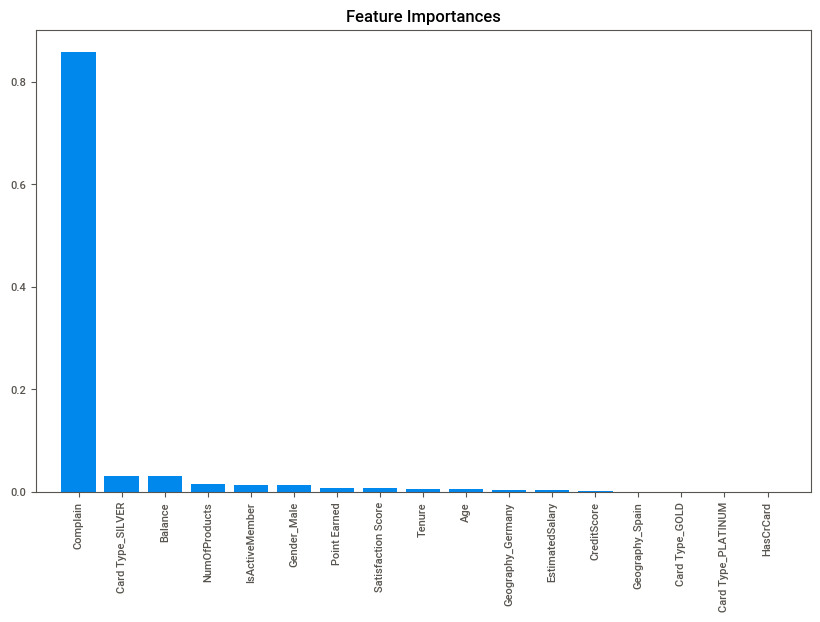

In [348]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Perform cross-validation
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and their mean
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

# Fit the Gradient Boosting Classifier to the training data
gb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = gb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

